# Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

In [2]:
df = pd.read_csv('Data/telco_customer_churn.csv', sep=',')

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7032, 21)

# Data preprocessing / Feature engineering

#### Select variables

### Initial look at the data

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Remove customerID and Churn

# selected_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
#                      'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
#                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
#                      'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
#                      'MonthlyCharges', 'TotalCharges']
# 
# df[selected_features].head(5)

df.drop(columns=['customerID', 'Churn']).head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [7]:
df_new = df.drop(columns=['customerID', 'Churn'])

In [8]:
df_new.shape

(7032, 19)

#### One-hot encoding

In [9]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

df_new = pd.get_dummies(df_new, columns=categorical_columns)

# df_new = df_new.drop(columns=categorical_columns)

In [10]:
df_new.shape

(7032, 46)

In [11]:
df_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

In [12]:
df_new.head(5)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Split into train and test set

In [13]:
X = df_new.values
y = df['Churn'].values

In [14]:
X

array([[1.0000e+00, 2.9850e+01, 2.9850e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.4000e+01, 5.6950e+01, 1.8895e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 5.3850e+01, 1.0815e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.0000e+00, 7.4400e+01, 3.0660e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.6000e+01, 1.0565e+02, 6.8445e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [15]:
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7032, 46)
(5625, 46)
(1407, 46)


# Build and train model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# model = DecisionTreeClassifier()

# model = DecisionTreeClassifier(max_depth=5, min_samples_split=4)

model = RandomForestClassifier(n_estimators=10, max_depth=5, class_weight={'Yes': 1.1}, random_state=10)

In [20]:
model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight={'Yes': 1.1},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [21]:
print(model.max_depth)
print(model.min_samples_split)
print(model.classes_)

5
2
['No' 'Yes']


# Make predictions

In [23]:
df_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

In [24]:
test_input = [2.0, 24.4, 1548.65, 
              0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,
              0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
              1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
              1.0, 0.0, 0.0, 0.0]

In [25]:
prediction = model.predict([test_input])
print(prediction)

['No']


In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

# Performance metrics

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [32]:
print(y_test[:12])
print(y_pred[:12])

['No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No']
['No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No']


In [33]:
confusion_matrix(y_test, y_pred)

array([[944,  94],
       [181, 188]])

In [34]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print(f'Accuracy: {acc:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall/Sensitivity: {recall:.4}')

Accuracy: 0.8045
Precision: 0.6667
Recall/Sensitivity: 0.5095


# Visualize

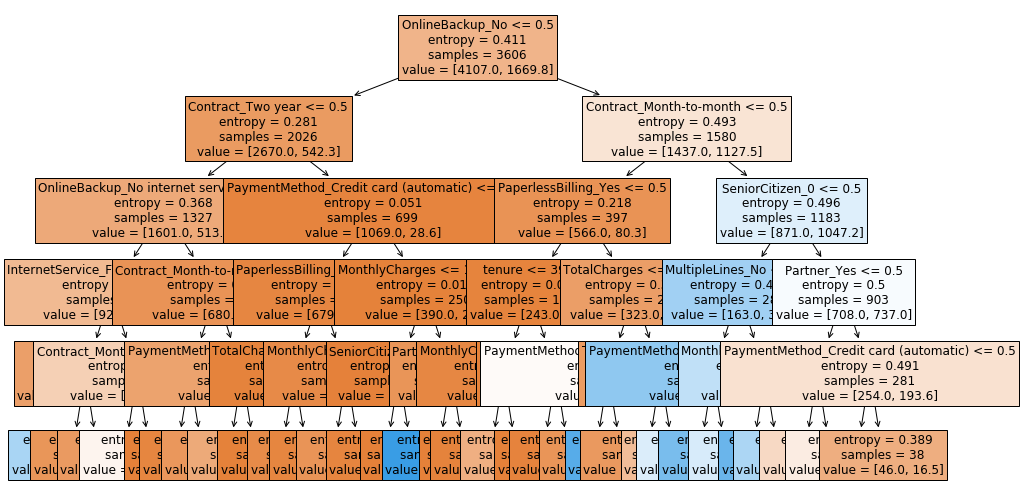

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,9))
single_tree = model.estimators_[0]
plot_tree(single_tree, filled=True, fontsize=12, feature_names=df_new.columns)
plt.show()

In [35]:
#Alternative/Interactive plotting
from sklearn.tree import export_graphviz
single_tree = model.estimators_[0]
dot_str = export_graphviz(single_tree, out_file=None, filled=True, rounded=True, special_characters=True,
                          impurity=False, feature_names=df_new.columns, class_names=model.classes_)

In [36]:
#print(dot_str) #copy this output to the link below

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<OnlineBackup_No &le; 0.5<br/>samples = 3606<br/>value = [4107.0, 1669.8]<br/>class = No>, fillcolor="#f0b48a"] ;
1 [label=<Contract_Two year &le; 0.5<br/>samples = 2026<br/>value = [2670.0, 542.3]<br/>class = No>, fillcolor="#ea9b61"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<OnlineBackup_No internet service &le; 0.5<br/>samples = 1327<br/>value = [1601.0, 513.7]<br/>class = No>, fillcolor="#eda979"] ;
1 -> 2 ;
3 [label=<InternetService_Fiber optic &le; 0.5<br/>samples = 846<br/>value = [921.0, 414.7]<br/>class = No>, fillcolor="#f1ba92"] ;
2 -> 3 ;
4 [label=<tenure &le; 3.5<br/>samples = 331<br/>value = [417.0, 100.1]<br/>class = No>, fillcolor="#eb9f69"] ;
3 -> 4 ;
5 [label=<samples = 31<br/>value = [20.0, 35.2]<br/>class = Yes>, fillcolor="#a9d5f4"] ;
4 -> 5 ;
6 [label=<samples = 300<br/>value = [397.0, 64.9]<br/>class = 

https://dreampuf.github.io/GraphvizOnline/

# Øvelser - Fine tune model

- Prøv at træne modellen med forskellige værdier for ```max_depth``` og ```min_samples_split```, og se hvordan det påvirker performance metrics.
- Prøv at fjerne kolonner i træningsdata og træn modellen igen. Se hvordan det påvirker performance metrics.
- Test forskellige kombinationer af de to overstående punkter, og se hvor god performance man kan få.
- Importer en Random Forest model og lav prædiktioner med denne på samme måde som overstående.

  ```from sklearn.ensemble import RandomForestClassifier```
- Afprøv andre parametre i Random Forest modellen fx ```n_estimators``` (antal Decision Trees).

# Exercise - Fine tune model

- Try training the model with different values for $max_depth$ and $min_samples_split$, and see how it affects the performance metrics.
- Try removing columns from the training data and retrain the model. See how it affects the performance metrics.
- Test different combinations of the methods in the two previous bullets, and see how high performance you can get.
- Import a Random Forest classification model and make prediction in the same way as above.
  
  ```from sklearn.ensemble import RandomForestClassifier```
- Test other parameters in the Random Forest model e.g. ```n_estimators``` (number of Decision Trees).